In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np

X = np.array([
    [2, -3], 
    [4, 1],
    [0, -2],
    [10, 3]
])
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [69]:
import os
os.getcwd()

'C:\\Users\\81809'

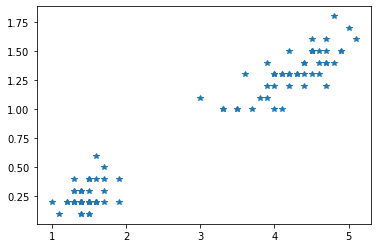

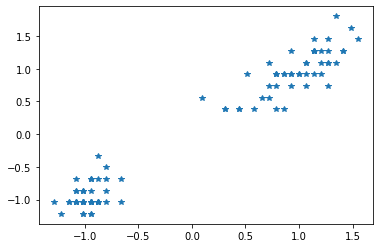

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data'][0:100, (2, 3)] # petal length & width
Y = iris['target'][0:100]

f1, ax1 = plt.subplots()
ax1.plot(X[:,0], X[:, 1], '*')

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
f2, ax2 = plt.subplots()
ax2.plot(X_std[:,0], X_std[:, 1], '*')


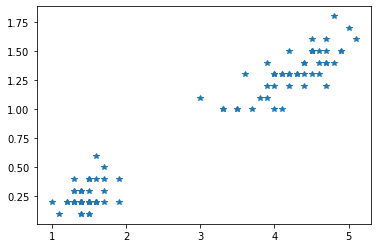

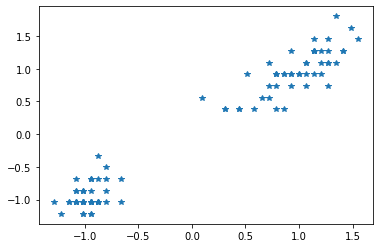

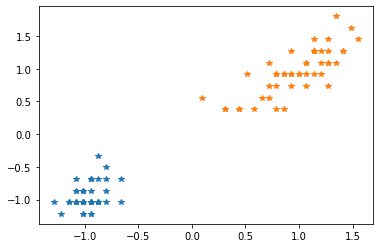

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

plt.close("all")

iris = datasets.load_iris()

X = iris['data'][0:100, (2, 3)] # petal length & width
Y = iris['target'][0:100]
f1, ax1 = plt.subplots()
ax1.plot(X[:,0], X[:, 1], '*')

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
f2, ax2 = plt.subplots()
ax2.plot(X_std[:,0], X_std[:, 1], '*')

df_clf = pd.DataFrame(np.c_[X_std, Y])
df_clf.columns = ['petalLength', 'petalWidth', 'target']
df_clf_group = df_clf.groupby('target')
f3, ax3 = plt.subplots()
for target, group in df_clf_group:
    ax3.plot(group.petalLength, group.petalWidth, '*', label = 'target')

SVC(C=0.01, kernel='linear')

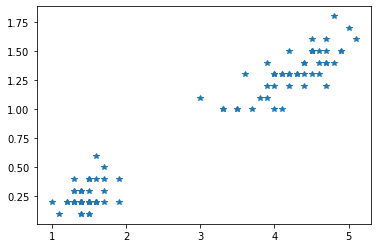

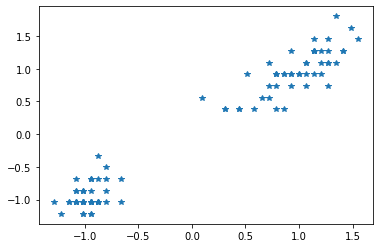

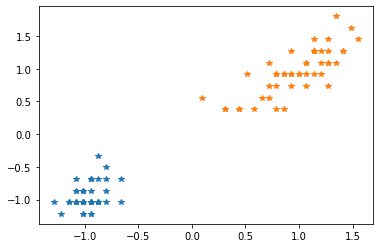

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

plt.close("all")

iris = datasets.load_iris()

X = iris['data'][0:100, (2, 3)] # petal length & width
Y = iris['target'][0:100]
f1, ax1 = plt.subplots()
ax1.plot(X[:,0], X[:, 1], '*')

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
f2, ax2 = plt.subplots()
ax2.plot(X_std[:,0], X_std[:, 1], '*')

df_clf = pd.DataFrame(np.c_[X_std, Y])
df_clf.columns = ['petalLength', 'petalWidth', 'target']
df_clf_group = df_clf.groupby('target')
f3, ax3 = plt.subplots()
for target, group in df_clf_group:
    ax3.plot(group.petalLength, group.petalWidth, '*', label = 'target')
    
svm_clf = SVC(C=0.01, kernel = "linear")
svm_clf.fit(X_std, Y)

In [30]:
svm_clf.predict([[1, 1]])
svm_clf.predict([[-1, -1]])

array([0])

<a list of 7 text.Text objects>

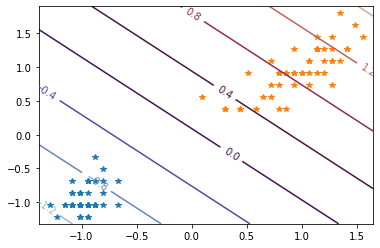

In [37]:
#draw contour with meshgrid
#mesh grid: A X B
#Have to put design metrix into decision funtion of the trained model
# reshape and ravel np.c_ and np.r_
[x0Min, x0Max] = [min(X_std[:, 0]) - 0.1, max(X_std[:, 0]) + 0.1]
[x1Min, x1Max] = [min(X_std[:, 1]) - 0.1, max(X_std[:, 1]) + 0.1]
delta = 0.01
[x0Plt, x1Plt] = np.meshgrid(np.arange(x0Min, x0Max, delta),
                            np.arange(x1Min, x1Max, delta))

f1, ax1 = plt.subplots()
for target, group in df_clf_group:
    ax1.plot(group.petalLength, group.petalWidth, '*', label = 'target')
h = svm_clf.decision_function(np.c_[x0Plt.ravel(), x1Plt.ravel()])
h = h.reshape(x0Plt.shape)
CS = ax1.contour(x0Plt, x1Plt, h, cmap = plt.cm.twilight)
ax1.clabel(CS)

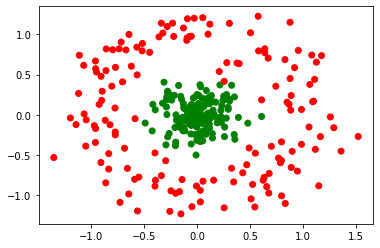

In [54]:
from sklearn import datasets
plt.close('all')
[X,Y] = datasets.make_circles(n_samples = 300, shuffle = True, noise = 0.2, random_state = 15, factor = 0.1)
# [X,Y] = datasets.make_moons(n_samples = 300, shuffle = True, noise = 0.1, random_state = 15)
f1, ax1 = plt.subplots()
# ax1.plot(X, Y, '*', label = 'target') ? why doenst work
rgb = np.array(['r', 'g', 'b'])
ax1.scatter(X[:,0], X[:,1], color = rgb[Y])

<a list of 10 text.Text objects>

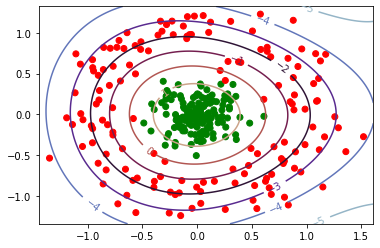

In [68]:
from sklearn import datasets
plt.close('all')

[X,Y] = datasets.make_circles(n_samples = 300, shuffle = True, noise = 0.2, random_state = 15, factor = 0.1)

f1, ax1 = plt.subplots()
# ax1.plot(X, Y, '*', label = 'target') ? why doenst work
rgb = np.array(['r', 'g', 'b'])
ax1.scatter(X[:,0], X[:,1], color = rgb[Y])
                              
svm_clf = SVC(C=3, kernel = "rbf", gamma = 0.5)
svm_clf.fit(X, Y)
                              
[x0Min, x0Max] = [min(X[:, 0]) - 0.1, max(X[:, 0]) + 0.1]
[x1Min, x1Max] = [min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1]
delta = 0.01
[x0Plt, x1Plt] = np.meshgrid(np.arange(x0Min, x0Max, delta),
                            np.arange(x1Min, x1Max, delta))

h = svm_clf.decision_function(np.c_[x0Plt.ravel(), x1Plt.ravel()])
h = h.reshape(x0Plt.shape)
CS = ax1.contour(x0Plt, x1Plt, h, cmap = plt.cm.twilight)
ax1.clabel(CS)
#train_test_split
